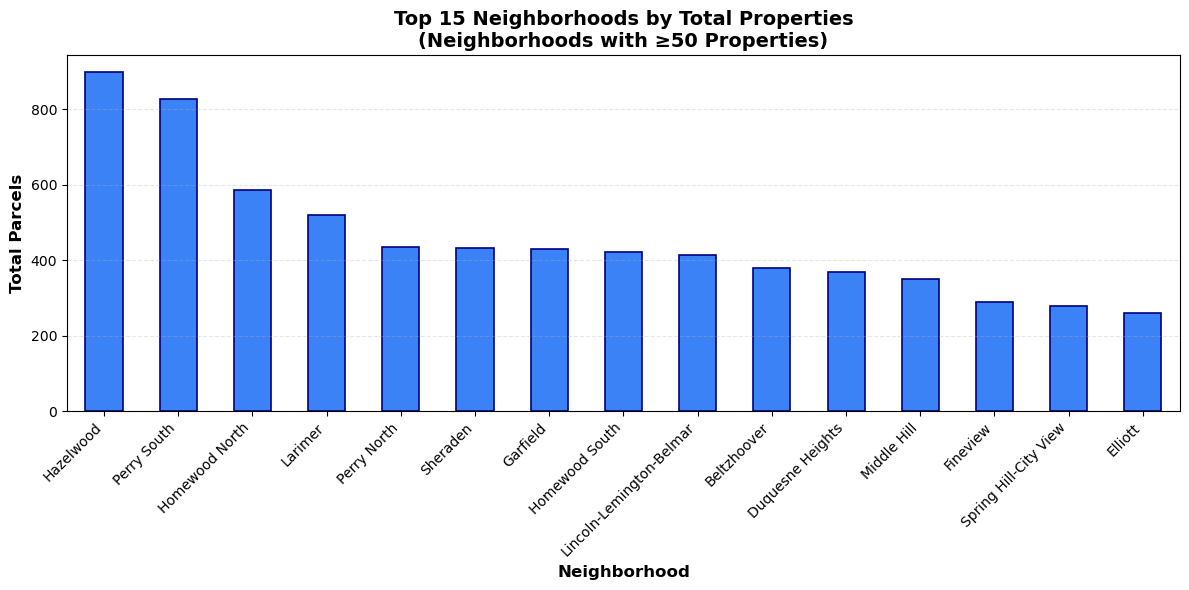

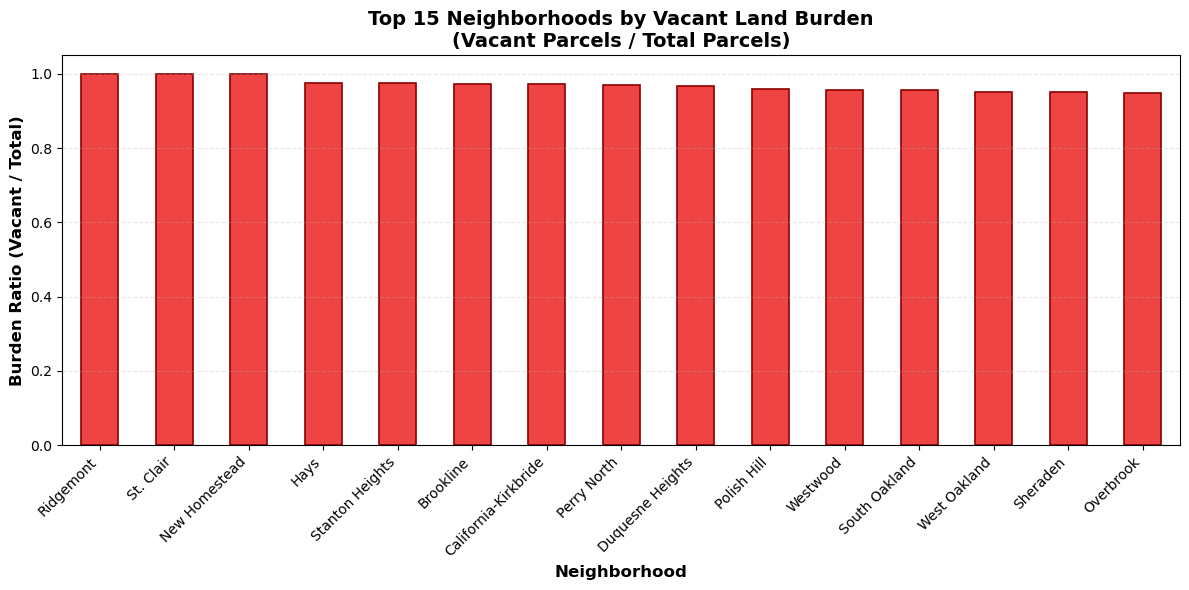

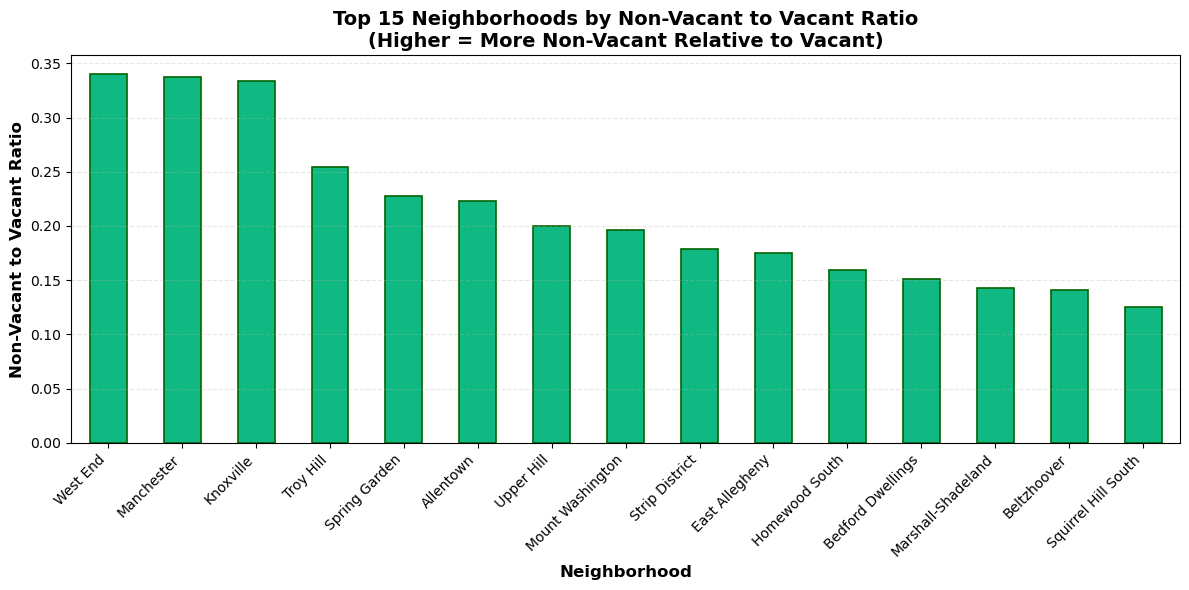


SUMMARY STATISTICS

Total neighborhoods analyzed (≥50 properties): 52

--- TOP 5 BY TOTAL PARCELS ---
Neighborhood                      Total   Vacant   Non-Vacant   Burden %
------------------------------------------------------------------------------------------
Hazelwood                           898      811           87      90.3%
Perry South                         828      779           49      94.1%
Homewood North                      586      532           54      90.8%
Larimer                             520      481           39      92.5%
Perry North                         434      421           13      97.0%

--- TOP 5 BY VACANCY BURDEN ---
Neighborhood                      Total   Vacant   Burden %
------------------------------------------------------------------------------------------
Ridgemont                            69       69     100.0%
St. Clair                            62       62     100.0%
New Homestead                       222      222     100.0%
Hays

In [35]:


import pandas as pd
import matplotlib.pyplot as plt

# Load the data
city_csv = pd.read_csv("https://data.wprdc.org/datastore/dump/e1dcee82-9179-4306-8167-5891915b62a7?bom=True")

# Find neighborhood column
neighborhood_col = None
for col in city_csv.columns:
    if 'neighborhood' in col.lower() or 'hood' in col.lower():
        neighborhood_col = col
        break

if neighborhood_col is None:
    print("Available columns:", city_csv.columns.tolist())
    print("\nPlease check the column name for neighborhoods")
else:
    # Drop rows without neighborhood
    city_csv = city_csv.dropna(subset=[neighborhood_col])
    
    # Create vacancy indicator (problem parcels)
    city_csv['is_vacant'] = city_csv['class'] == 'Vacant Land'
    
    # Group by neighborhood and calculate stats
    city_grouped = city_csv.groupby(neighborhood_col).agg(
        total_parcels=('class', 'count'),
        vacant_parcels=('is_vacant', 'sum')
    )
    
    # Calculate non-vacant count
    city_grouped['non_vacant_parcels'] = city_grouped['total_parcels'] - city_grouped['vacant_parcels']
    
    # Calculate burden ratio (vacant / total)
    city_grouped['burden_ratio'] = city_grouped['vacant_parcels'] / city_grouped['total_parcels']
    
    # Calculate non-vacant to vacant ratio
    city_grouped['nv_to_v_ratio'] = city_grouped['non_vacant_parcels'] / (city_grouped['vacant_parcels'] + 0.01)
    
    # Filter for neighborhoods with at least 50 parcels
    city_grouped = city_grouped[city_grouped['total_parcels'] >= 50]
    
    # Sort by total parcels
    city_grouped_sorted = city_grouped.sort_values('total_parcels', ascending=False)
    
    # Plot 1: Top 15 Neighborhoods by Total Parcels
    plt.figure(figsize=(12, 6))
    city_grouped_sorted.head(15)['total_parcels'].plot(kind='bar', color='#3b82f6', edgecolor='navy', linewidth=1.2)
    plt.title('Top 15 Neighborhoods by Total Properties\n(Neighborhoods with ≥50 Properties)', fontsize=14, fontweight='bold')
    plt.xlabel('Neighborhood', fontsize=12, fontweight='bold')
    plt.ylabel('Total Parcels', fontsize=12, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.show()
    
    # Sort by burden ratio (vacancy rate)
    burden_sorted = city_grouped.sort_values('burden_ratio', ascending=False)
    
    # Plot 2: Top 15 Neighborhoods by Vacancy Burden
    plt.figure(figsize=(12, 6))
    burden_sorted.head(15)['burden_ratio'].plot(kind='bar', color='#ef4444', edgecolor='darkred', linewidth=1.2)
    plt.title('Top 15 Neighborhoods by Vacant Land Burden\n(Vacant Parcels / Total Parcels)', fontsize=14, fontweight='bold')
    plt.xlabel('Neighborhood', fontsize=12, fontweight='bold')
    plt.ylabel('Burden Ratio (Vacant / Total)', fontsize=12, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.show()
    
    # Sort by non-vacant to vacant ratio
    ratio_sorted = city_grouped.sort_values('nv_to_v_ratio', ascending=False)
    
    # Plot 3: Top 15 Neighborhoods by Non-Vacant to Vacant Ratio
    plt.figure(figsize=(12, 6))
    ratio_sorted.head(15)['nv_to_v_ratio'].plot(kind='bar', color='#10b981', edgecolor='darkgreen', linewidth=1.2)
    plt.title('Top 15 Neighborhoods by Non-Vacant to Vacant Ratio\n(Higher = More Non-Vacant Relative to Vacant)', fontsize=14, fontweight='bold')
    plt.xlabel('Neighborhood', fontsize=12, fontweight='bold')
    plt.ylabel('Non-Vacant to Vacant Ratio', fontsize=12, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\n" + "="*90)
    print("SUMMARY STATISTICS")
    print("="*90)
    print(f"\nTotal neighborhoods analyzed (≥50 properties): {len(city_grouped)}")
    
    print("\n--- TOP 5 BY TOTAL PARCELS ---")
    print(f"{'Neighborhood':<30} {'Total':>8} {'Vacant':>8} {'Non-Vacant':>12} {'Burden %':>10}")
    print("-"*90)
    for idx, row in city_grouped_sorted.head(5).iterrows():
        print(f"{idx:<30} {int(row['total_parcels']):>8} {int(row['vacant_parcels']):>8} {int(row['non_vacant_parcels']):>12} {row['burden_ratio']*100:>9.1f}%")
    
    print("\n--- TOP 5 BY VACANCY BURDEN ---")
    print(f"{'Neighborhood':<30} {'Total':>8} {'Vacant':>8} {'Burden %':>10}")
    print("-"*90)
    for idx, row in burden_sorted.head(5).iterrows():
        print(f"{idx:<30} {int(row['total_parcels']):>8} {int(row['vacant_parcels']):>8} {row['burden_ratio']*100:>9.1f}%")
    
    print("\n--- TOP 5 BY NON-VACANT TO VACANT RATIO ---")
    print(f"{'Neighborhood':<30} {'Ratio':>8} {'Vacant':>8} {'Non-Vacant':>12}")
    print("-"*90)
    for idx, row in ratio_sorted.head(5).iterrows():
        print(f"{idx:<30} {row['nv_to_v_ratio']:>8.2f} {int(row['vacant_parcels']):>8} {int(row['non_vacant_parcels']):>12}")
    
    print("="*90)

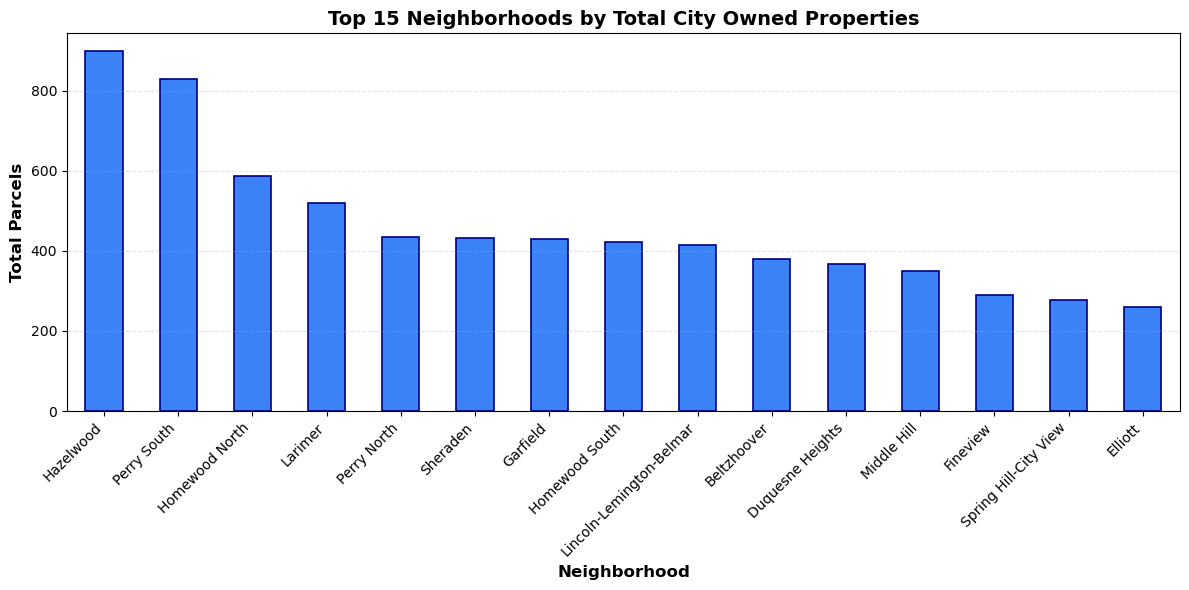

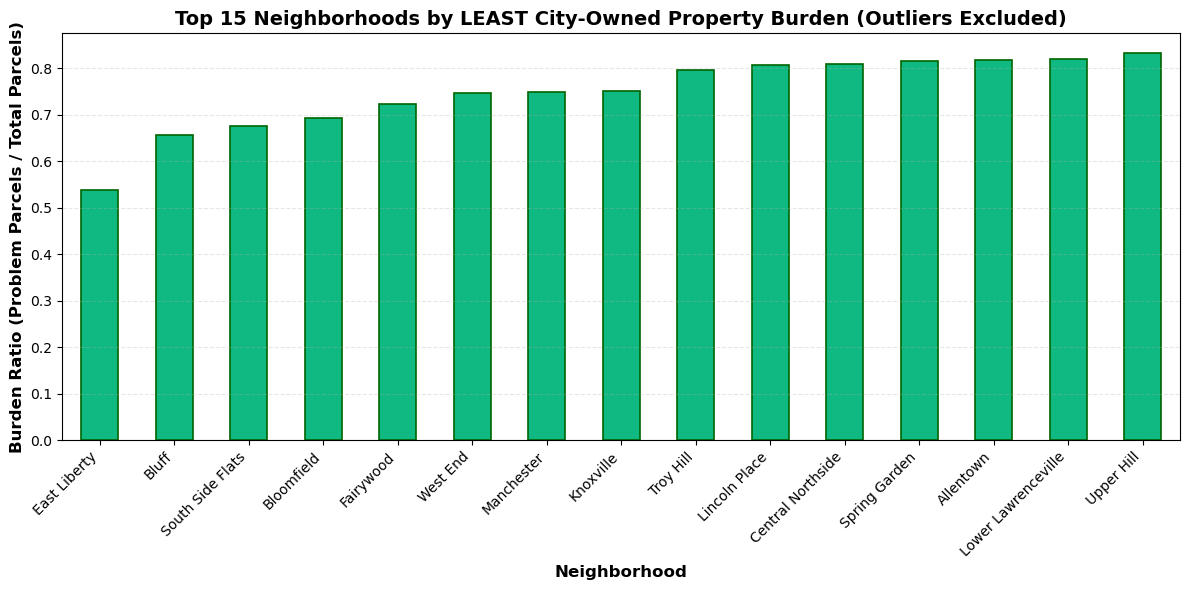


COMPREHENSIVE NEIGHBORHOOD DATA TABLE

Dataset Summary:
  • Total neighborhoods (≥25 properties): 68
  • Total city-owned parcels: 12,452
  • Total problem parcels: 11,343
  • Overall burden ratio: 91.09%

COMPLETE NEIGHBORHOOD RANKINGS
Rank   Neighborhood                        Total      Problem    Non-Prob   Burden %     Rank by Burden 
------------------------------------------------------------------------------------------------------------------------
1      Hazelwood                           898        811        87         90.3       % #29            
2      Perry South                         828        779        49         94.1       % #47            
3      Homewood North                      586        532        54         90.8       % #31            
4      Larimer                             520        481        39         92.5       % #39            
5      Perry North                         434        421        13         97.0       % #60            
6      Sher

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the city-owned properties data
city = pd.read_csv("https://data.wprdc.org/datastore/dump/e1dcee82-9179-4306-8167-5891915b62a7?bom=True", low_memory=False)

# Find neighborhood column
neighborhood_col = None
for col in city.columns:
    if 'neighborhood' in col.lower() or 'hood' in col.lower():
        neighborhood_col = col
        break

if neighborhood_col is None:
    print("Available columns:", city.columns.tolist())
    print("\nPlease specify the neighborhood column name")
else:
    # Drop rows without neighborhood
    city = city.dropna(subset=[neighborhood_col])
    
    # Find columns for problem identification
    inventory_col = None
    status_col = None
    
    for col in city.columns:
        col_lower = col.lower()
        if 'inventory' in col_lower or 'type' in col_lower:
            inventory_col = col
        if 'status' in col_lower or 'current' in col_lower:
            status_col = col
    
    # Create problem mask based on "class" column - check if it's Vacant Land or Building
    if 'class' in city.columns:
        problem_mask = city['class'].astype(str).str.contains("Vacant Land|Vacant Building", case=False, na=False)
    else:
        # Fallback to other columns if 'class' doesn't exist
        problem_mask = pd.Series([False] * len(city), index=city.index)
        
        if inventory_col:
            problem_mask |= city[inventory_col].astype(str).str.contains("Vacant|Surplus|Sideyard|Reserve", case=False, na=False)
        
        if status_col:
            problem_mask |= city[status_col].astype(str).str.contains("Vacant|Demolition|Abandoned", case=False, na=False)
    
    city["is_problem"] = problem_mask
    
    # Group by neighborhood
    city_grouped = city.groupby(neighborhood_col).agg(
        total_parcels=('class', 'count'),
        problem_parcels=('is_problem', 'sum')
    )
    
    # Calculate metrics
    city_grouped['burden_ratio'] = city_grouped['problem_parcels'] / city_grouped['total_parcels']
    city_grouped['non_problem_parcels'] = city_grouped['total_parcels'] - city_grouped['problem_parcels']
    city_grouped['burden_percentage'] = city_grouped['burden_ratio'] * 100
    
    # Filter for neighborhoods with at least 50 parcels
    city_grouped_filtered = city_grouped[city_grouped['total_parcels'] >= 25].copy()
    
    # Sort by total parcels
    city_grouped_sorted = city_grouped_filtered.sort_values('total_parcels', ascending=False)
    
    # Sort by burden ratio (ascending for least burden)
    burden_sorted = city_grouped_filtered.sort_values('burden_ratio', ascending=True)
    
    # ORIGINAL CHART 1: Top 15 Neighborhoods by Total City Owned Properties
    plt.figure(figsize=(12, 6))
    city_grouped_sorted.head(15)['total_parcels'].plot(kind='bar', color='#3b82f6', edgecolor='navy', linewidth=1.2)
    plt.title('Top 15 Neighborhoods by Total City Owned Properties', fontsize=14, fontweight='bold')
    plt.xlabel('Neighborhood', fontsize=12, fontweight='bold')
    plt.ylabel('Total Parcels', fontsize=12, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.show()
    
    # ORIGINAL CHART 2: Top 15 Neighborhoods by LEAST City-Owned Property Burden
    plt.figure(figsize=(12, 6))
    burden_sorted.head(15)['burden_ratio'].plot(kind='bar', color='#10b981', edgecolor='darkgreen', linewidth=1.2)
    plt.title('Top 15 Neighborhoods by LEAST City-Owned Property Burden (Outliers Excluded)', fontsize=14, fontweight='bold')
    plt.xlabel('Neighborhood', fontsize=12, fontweight='bold')
    plt.ylabel('Burden Ratio (Problem Parcels / Total Parcels)', fontsize=12, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.show()
    
    # COMPREHENSIVE DATA TABLE
    print("\n" + "="*120)
    print("COMPREHENSIVE NEIGHBORHOOD DATA TABLE")
    print("="*120)
    print(f"\nDataset Summary:")
    print(f"  • Total neighborhoods (≥25 properties): {len(city_grouped_filtered)}")
    print(f"  • Total city-owned parcels: {city_grouped_filtered['total_parcels'].sum():,}")
    print(f"  • Total problem parcels: {int(city_grouped_filtered['problem_parcels'].sum()):,}")
    print(f"  • Overall burden ratio: {city_grouped_filtered['problem_parcels'].sum() / city_grouped_filtered['total_parcels'].sum():.2%}")
    
    print("\n" + "="*120)
    print("COMPLETE NEIGHBORHOOD RANKINGS")
    print("="*120)
    print(f"{'Rank':<6} {'Neighborhood':<35} {'Total':<10} {'Problem':<10} {'Non-Prob':<10} {'Burden %':<12} {'Rank by Burden':<15}")
    print("-"*120)
    
    # Create ranking columns
    city_grouped_sorted['rank_total'] = range(1, len(city_grouped_sorted) + 1)
    city_grouped_sorted['rank_burden'] = city_grouped_sorted['burden_ratio'].rank(ascending=True, method='min').astype(int)
    
    for idx, row in city_grouped_sorted.iterrows():
        print(f"{int(row['rank_total']):<6} {idx:<35} {int(row['total_parcels']):<10} {int(row['problem_parcels']):<10} {int(row['non_problem_parcels']):<10} {row['burden_percentage']:<11.1f}% #{int(row['rank_burden']):<14}")
    
    print("="*120)
    
    # Export to CSV
    export_df = city_grouped_sorted[['total_parcels', 'problem_parcels', 'non_problem_parcels', 'burden_ratio', 'burden_percentage']].copy()
    export_df.columns = ['Total_Parcels', 'Problem_Parcels', 'Non_Problem_Parcels', 'Burden_Ratio', 'Burden_Percentage']
